In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

In [17]:
# Load dataset
data = pd.read_csv("fraud_detection_sample.csv")

# Display first few rows
data.head() 

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,Class
0,15795,4292.21,0.593101,-1.592994,0.126380,0.189706,0.333860,-1.535040,0.872197,-2.386930,-0.190872,-1.846573,0
1,860,2145.54,-0.309546,0.440475,1.938929,-0.661982,1.431367,-1.880010,-0.315087,-0.495878,-0.198196,-0.428655,0
2,76820,3754.60,0.326133,-0.019638,-1.000331,0.425887,1.081767,0.712712,-0.571746,1.097300,0.510157,1.029441,0
3,54886,3772.96,-1.251114,0.552490,-0.677745,0.019148,-1.312219,-1.883150,0.332608,-1.565648,1.272570,-0.336895,0
4,6265,516.52,0.924027,0.223914,0.513908,-0.641487,0.622070,-0.372319,0.933128,-3.007632,0.126314,-0.846434,0


C:\Users\GAURAV MISHRA\AppData\Local\Temp\ipykernel_39176\3201308863.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Class', palette='viridis')


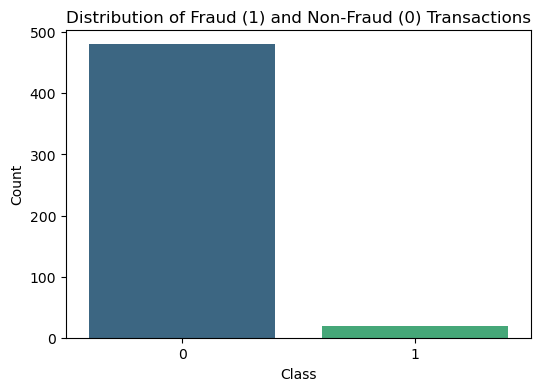

(Time      0
 Amount    0
 V1        0
 V2        0
 V3        0
 V4        0
 V5        0
 V6        0
 V7        0
 V8        0
 V9        0
 V10       0
 Class     0
 dtype: int64,
 Class
 0    480
 1     20
 Name: count, dtype: int64)

In [19]:
#EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values and class distribution
missing_values = data.isnull().sum()
class_distribution = data['Class'].value_counts()

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Class', palette='viridis')
plt.title("Distribution of Fraud (1) and Non-Fraud (0) Transactions")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

missing_values, class_distribution


In [21]:
# Step 3: Split features and target
X = data.drop("Class", axis=1)
y = data["Class"]


In [27]:
# Handle Imbalanced Data using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [29]:
# Train-Test Split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


In [31]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 


In [33]:
# Train a Model (Random Forest)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [35]:
# Evaluate the Model
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[92  4]
 [ 1 95]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        96
           1       0.96      0.99      0.97        96

    accuracy                           0.97       192
   macro avg       0.97      0.97      0.97       192
weighted avg       0.97      0.97      0.97       192



Confusion Matrix:
[[92  4]
 [ 1 95]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        96
           1       0.96      0.99      0.97        96

    accuracy                           0.97       192
   macro avg       0.97      0.97      0.97       192
weighted avg       0.97      0.97      0.97       192

AUC Score: 0.9961


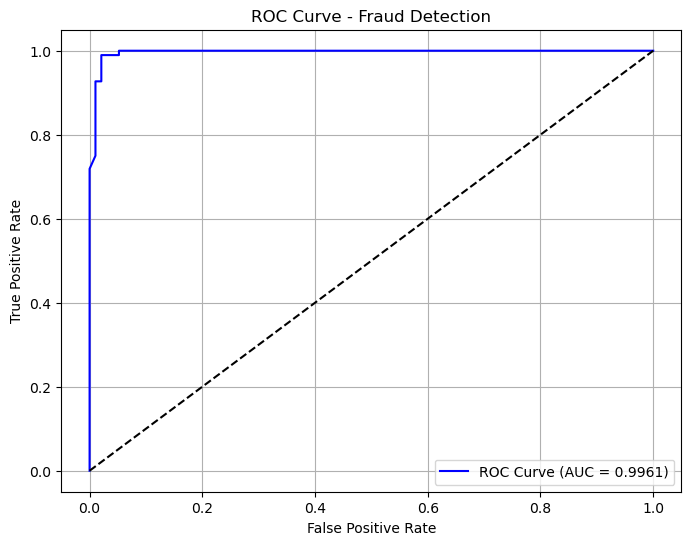

In [37]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE

# Step 2: Load Dataset
data = pd.read_csv("fraud_detection_sample.csv")

# Step 3: Split Features and Target
X = data.drop("Class", axis=1)
y = data["Class"]

# Step 4: Handle Imbalanced Data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Step 8: Model Prediction
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # for ROC curve

# Step 9: Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC and AUC
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

print(f"AUC Score: {roc_auc:.4f}")

# Step 10: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="blue")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Fraud Detection")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
